KeyboardInterrupt: 

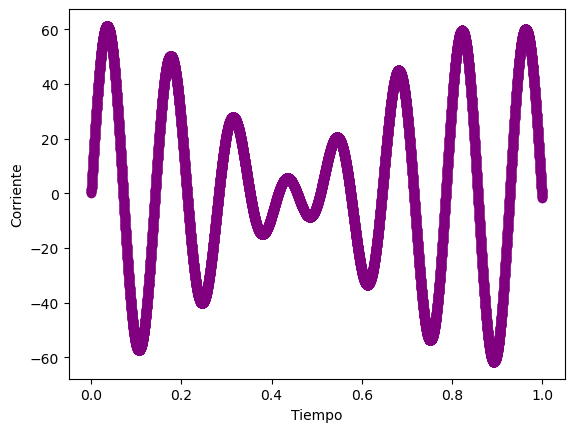

In [17]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(0,1,10000)

def funcion_flujo (t):
    return np.pi*(156.25)*(0.005)*np.cos(3.5*t)*np.cos(2*np.pi*7*t)

def Derivative (f,x,h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

def corriente (t):
    return -1/(1.75)*(Derivative(funcion_flujo,t,1e-13))
ejey=corriente(t)

plt.scatter(t, ejey, color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Corriente')

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

#Si reducimos la tolerancia un poco en la siguiente función deberiamos poder hallar las 3 raices que buscamos

def GetRootsGLeg(f,df,x,tolerancia = 4):
    
    Roots = np.array([])
    
    for i in x:
        root = GetNewton(f,df,i)
        if type(root)==float:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

print(GetRootsGLeg(corriente, Derivative, t))

